# Predicting Cooling Load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

### Loading the dataset

In [4]:
df=pd.read_csv('energy_efficiency_data.csv')
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
df.isnull().mean()*100

Relative_Compactness         0.0
Surface_Area                 0.0
Wall_Area                    0.0
Roof_Area                    0.0
Overall_Height               0.0
Orientation                  0.0
Glazing_Area                 0.0
Glazing_Area_Distribution    0.0
Heating_Load                 0.0
Cooling_Load                 0.0
dtype: float64

In [8]:
df.shape

(768, 10)

In [9]:
df.duplicated().sum()

0

### Univariate analysis

## KDE Plot

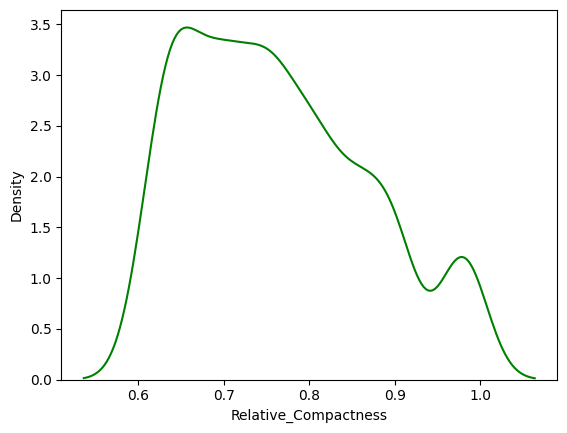

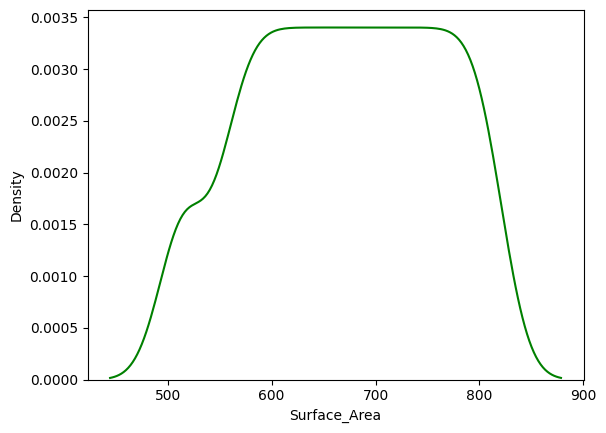

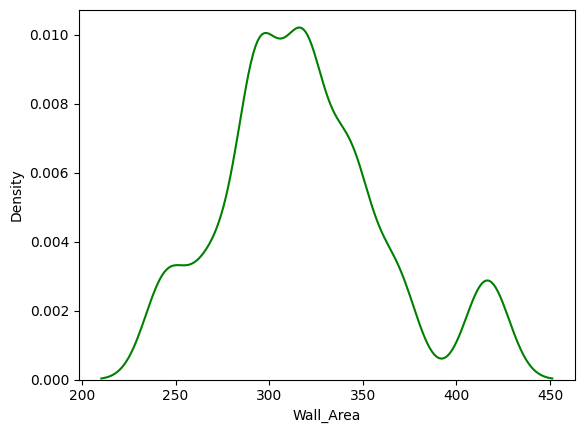

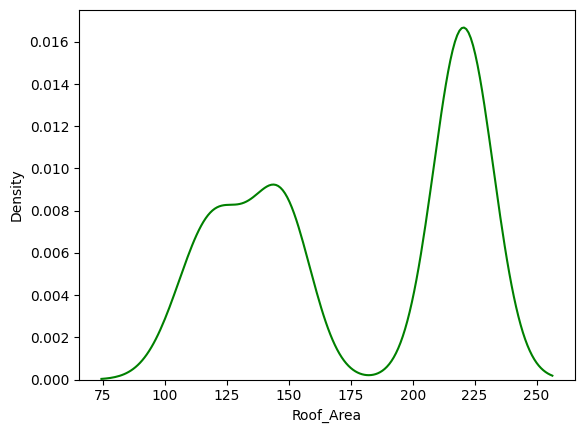

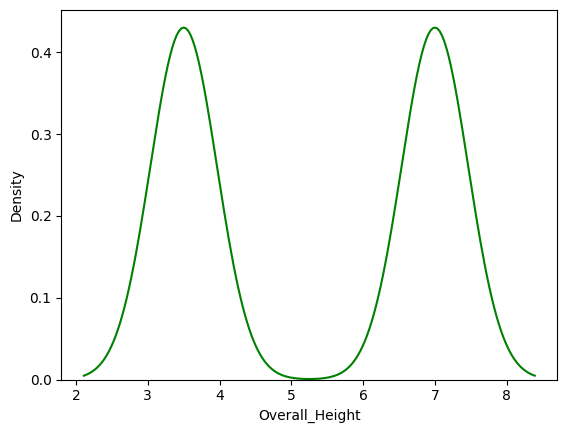

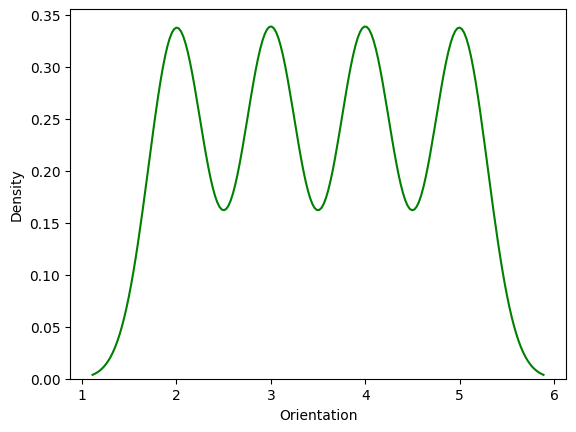

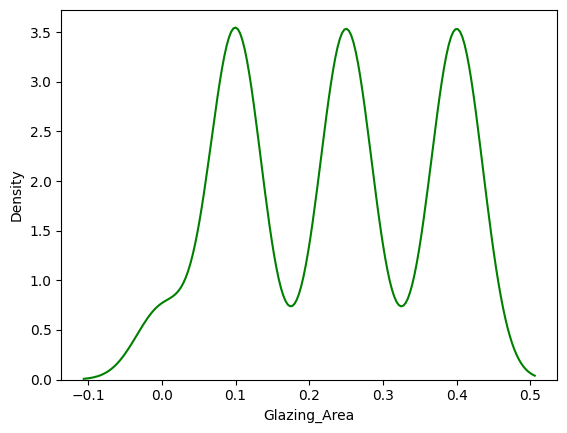

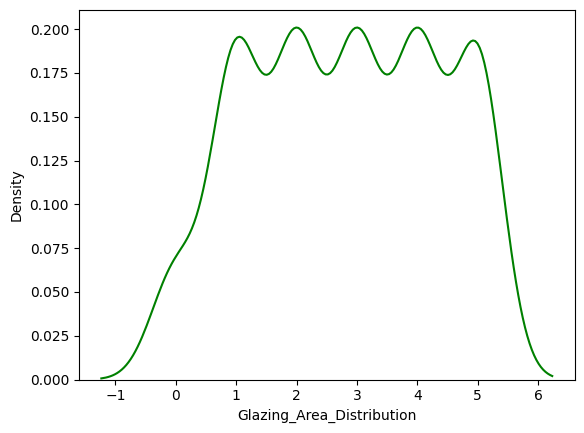

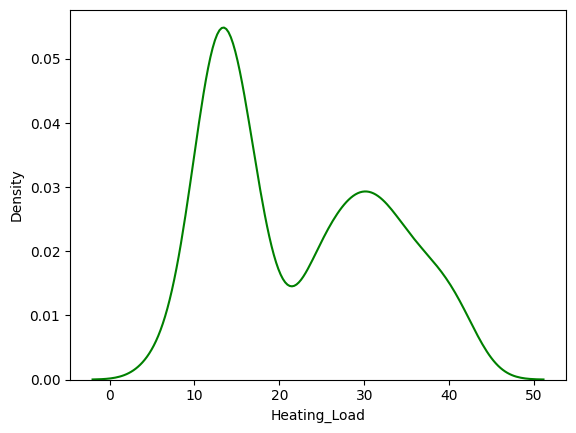

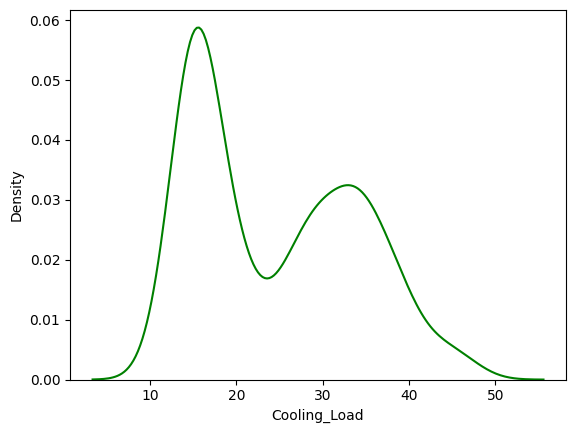

In [10]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i], color= "green")
        plt.show()

## Hist Plot

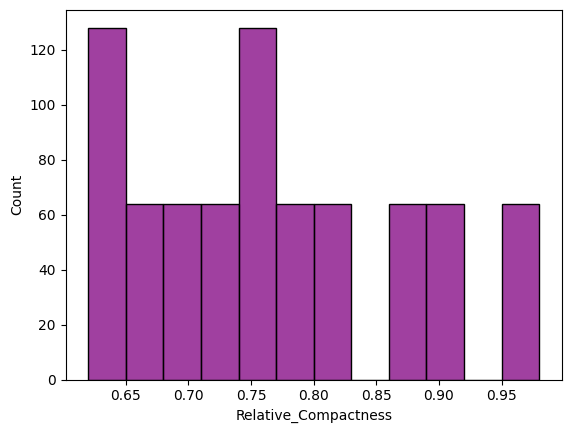

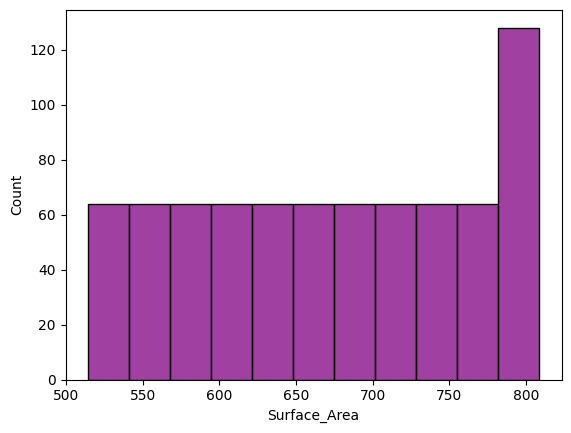

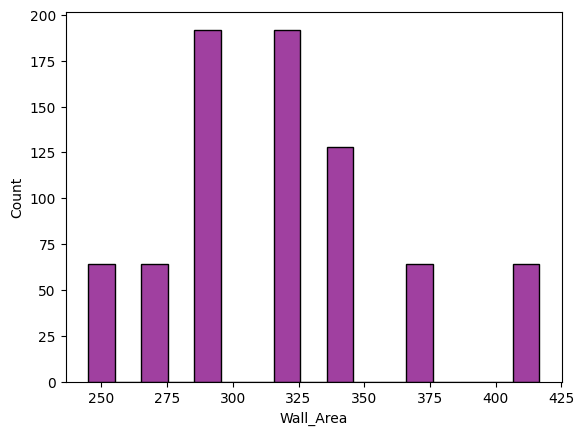

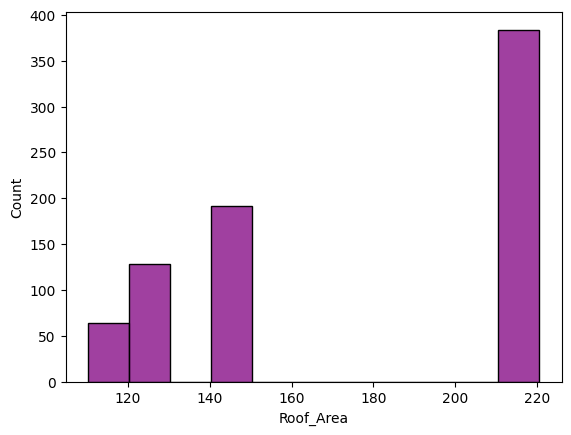

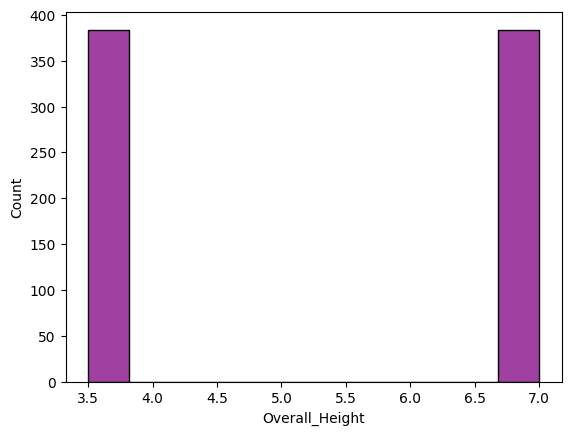

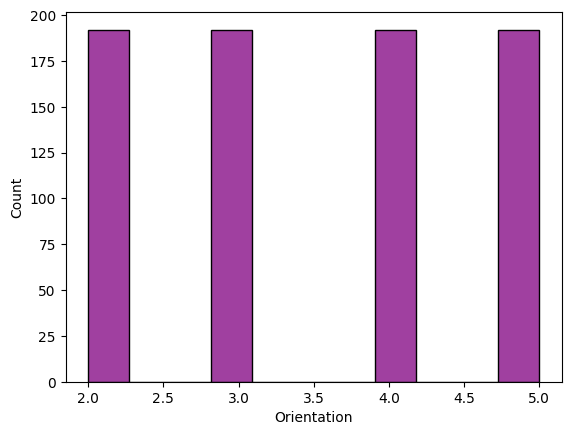

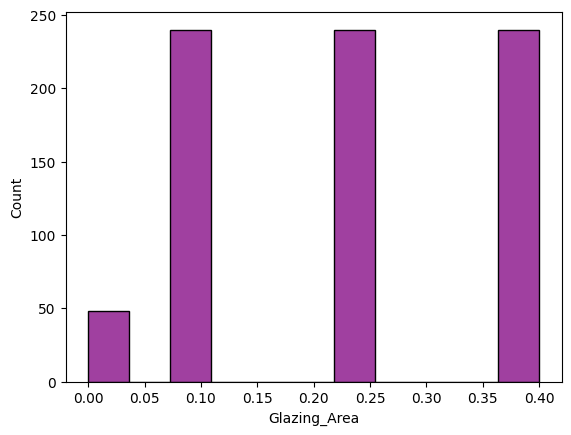

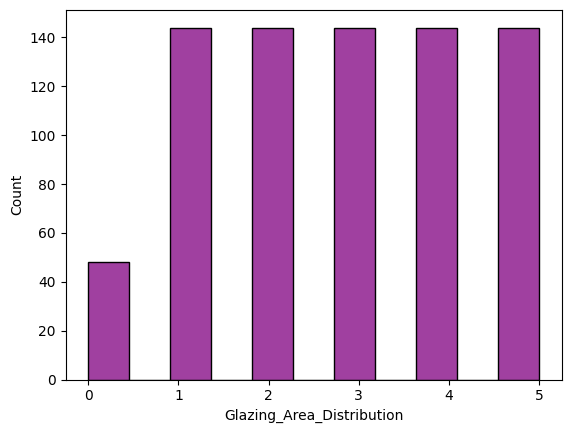

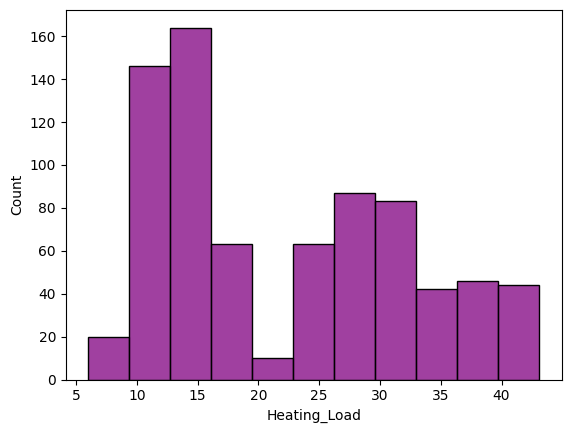

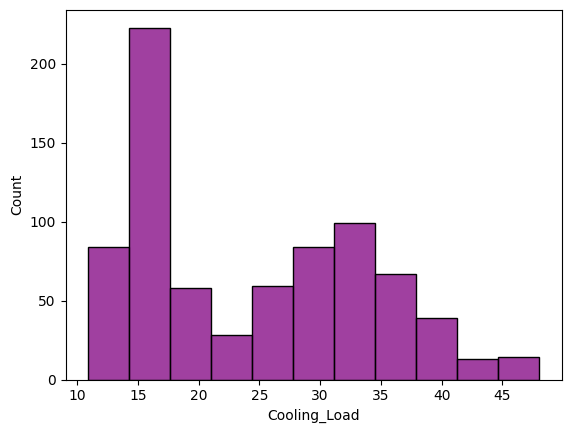

In [11]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i], color= "purple")
        plt.show()

## Box Plot

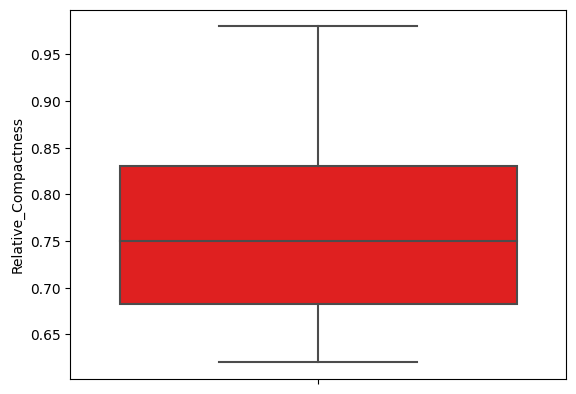

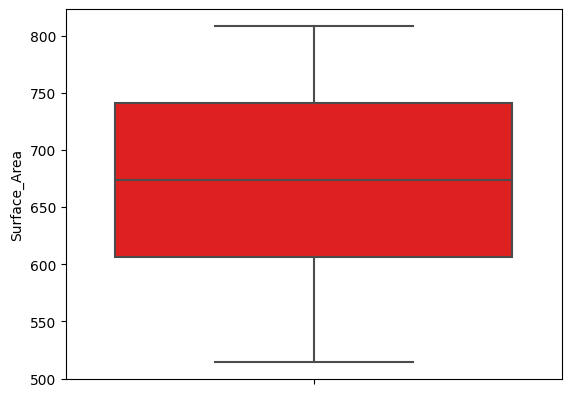

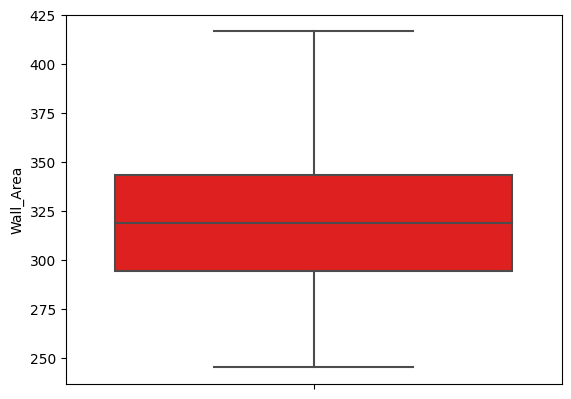

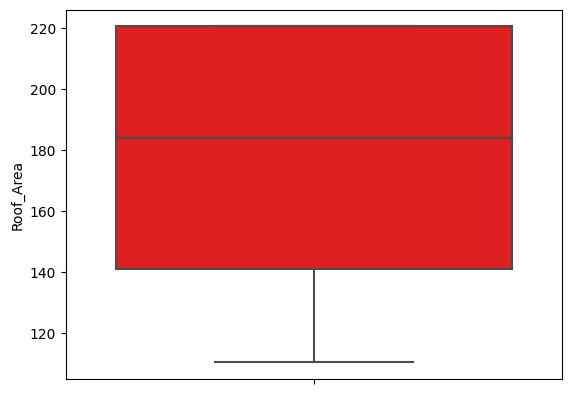

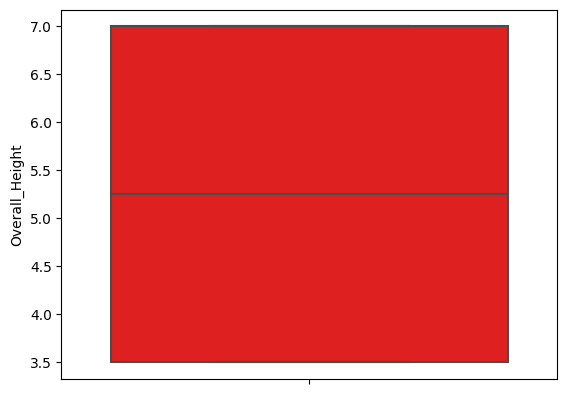

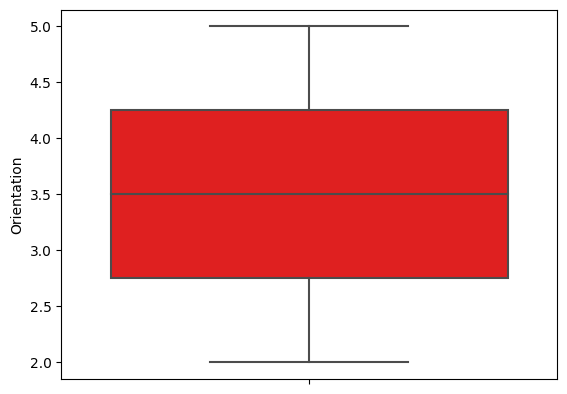

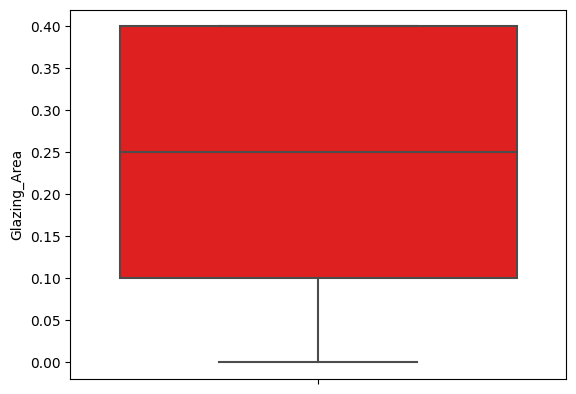

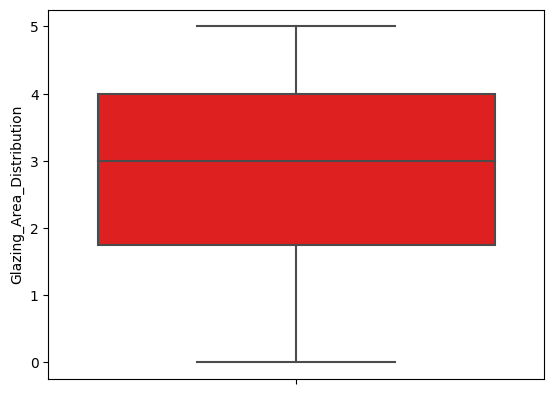

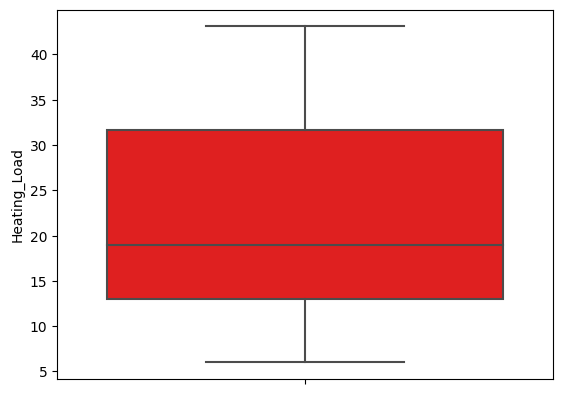

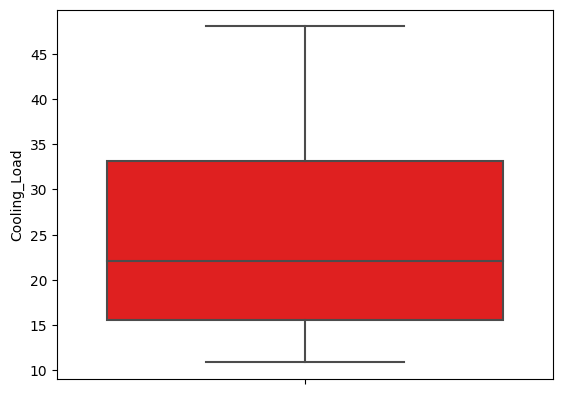

In [12]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i], color= "red")
        plt.show()

## Multi variate analysis

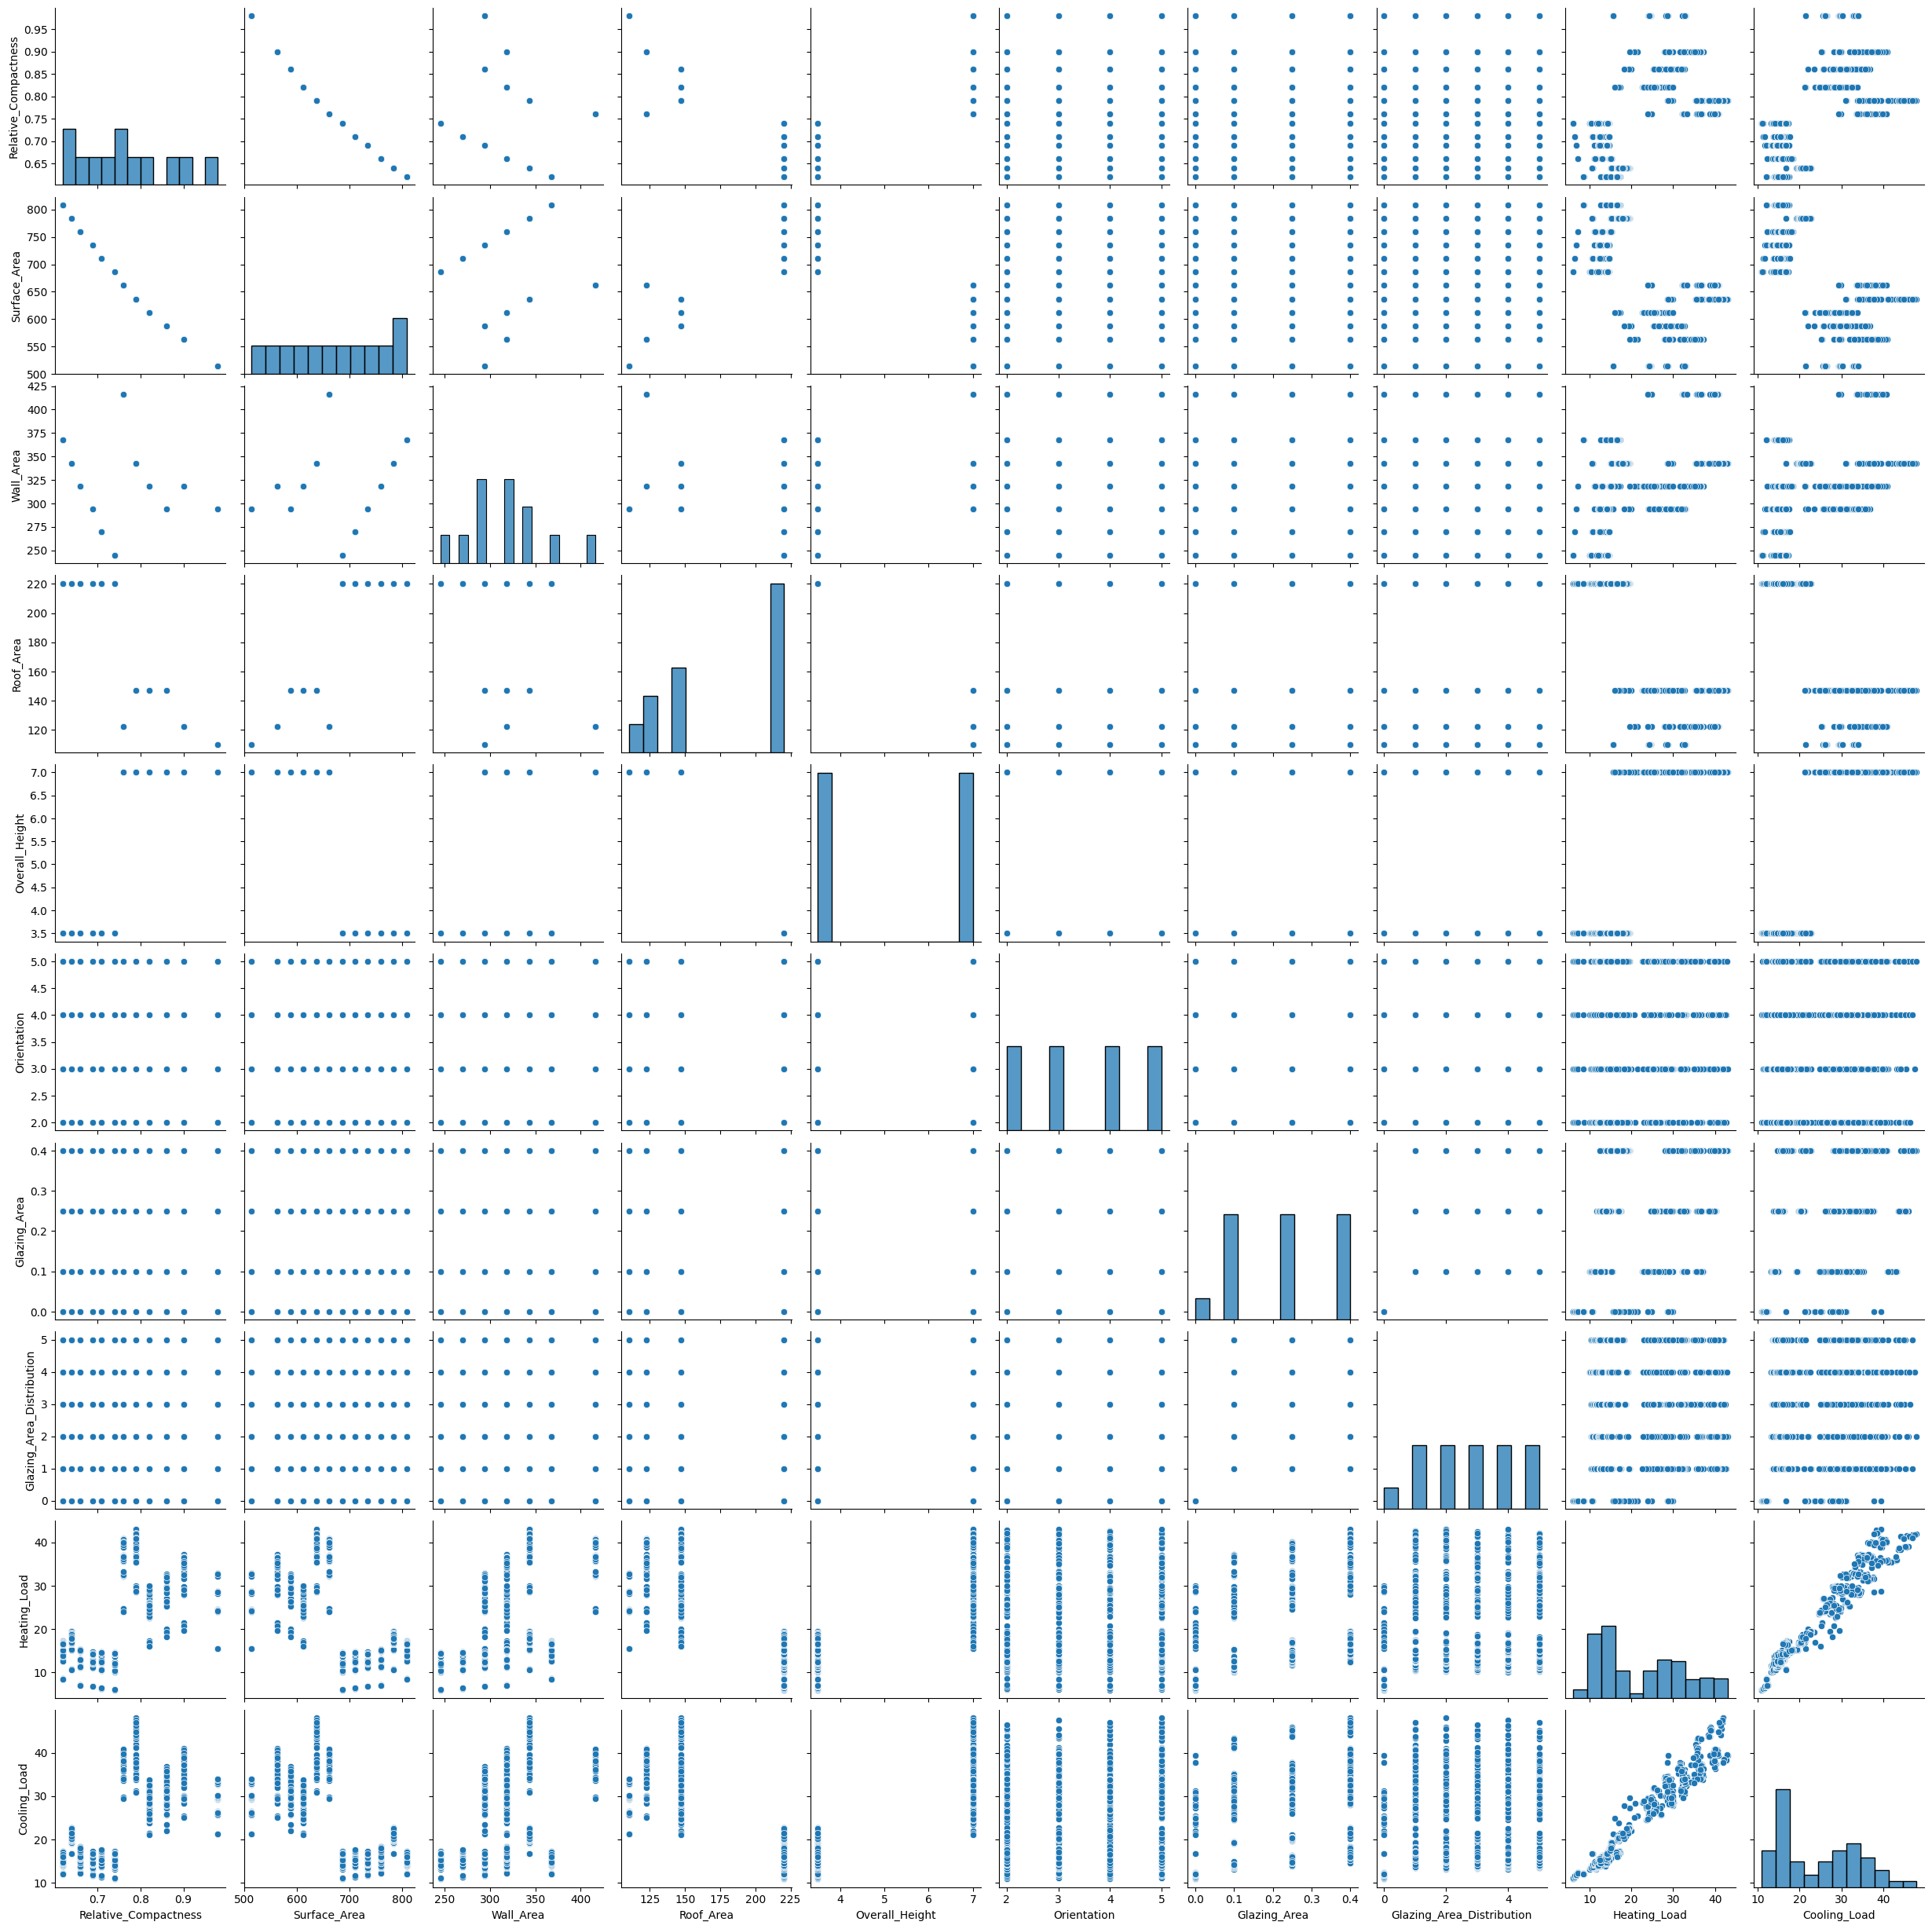

In [14]:
sns.pairplot(df);

### Plotting the correlation with the target

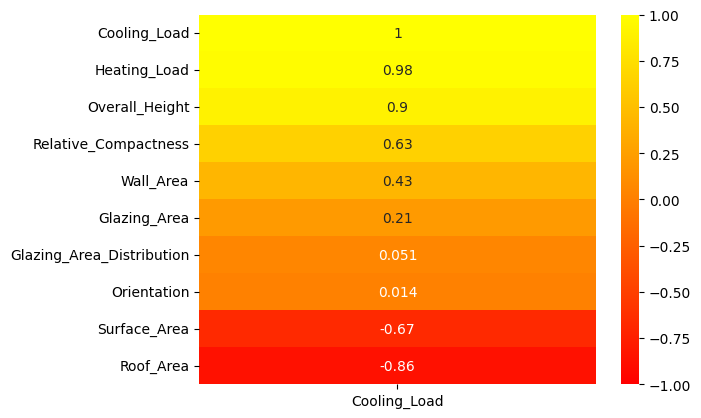

In [15]:
sns.heatmap(df.corr()[['Cooling_Load']].sort_values(by='Cooling_Load', ascending= False), vmin=-1, vmax=1, annot=True, cmap= "autumn");

In [17]:
x= df[['Heating_Load','Glazing_Area_Distribution','Glazing_Area','Orientation', 'Overall_Height', 'Roof_Area', 'Wall_Area','Surface_Area','Relative_Compactness']]

In [18]:
y= df[['Cooling_Load']].values

In [19]:
sc= StandardScaler()

In [20]:
x=sc.fit_transform(x)

## Model Selection using Cross Validation

In [21]:
models ={
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "LinearSVR": LinearSVR(),
    "DecisionTreeRegrressor": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

In [22]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring= "neg_mean_squared_error", cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse= np.sqrt(-scores)
    rmse_average= np.mean(rmse)
    print("AVERAGE RMSE: ", rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.9797188775943
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.9769705169516623
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  2.2275746531435527
****************************************************************************************************
cross validation model : DecisionTreeRegrressor
AVERAGE RMSE:  1.8135547418565043
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.435327871713238
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.996445466548839
**********************************************

## Model Selection

In [23]:
model= Ridge()

In [24]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [25]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae= mean_absolute_error(y_test, model.predict(x_test))
mse= mean_squared_error(y_test, model.predict(x_test))
rmse= np.sqrt(mse)
print("r2score: ", score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)
print("*"*100)

model traines with Ridge()
r2score:  95.79802818167144
training_score:  95.85811216823375
testing_score:  95.79802818167144
mae:  1.4520319158037107
mse:  3.9521892690624965
rmse_test:  1.9880113855464954
****************************************************************************************************


In [26]:
y_pred = model.predict(x)

In [27]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,21.33,19.462304
1,21.33,19.623581
2,21.33,19.784858
3,21.33,19.946135
4,28.28,24.450360


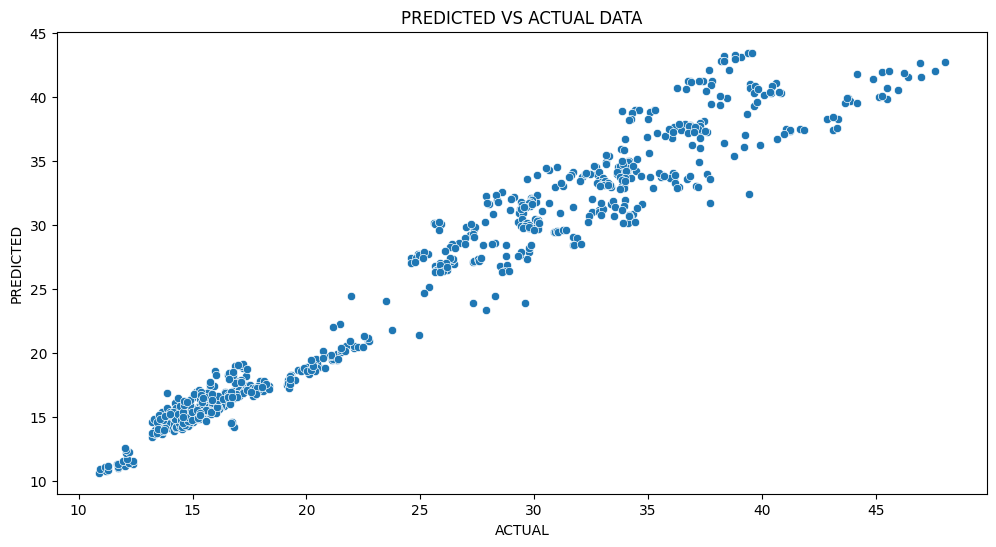

In [28]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y= "PREDICTED");